## Importing the Data

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression,SGDClassifier, RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt
import numpy as np

# MANUAL FILE
from sample_data.learning_plot import plot_learning_curve

from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder, minmax_scale
from sklearn import linear_model
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [13]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/attrition.csv')

In [14]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7
1,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,80,0,8,3,3,8,7,3,0
2,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,80,1,6,3,3,2,2,2,2
3,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,80,0,8,2,2,7,7,3,6
4,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,80,3,12,3,2,1,0,0,0


In [15]:
data.shape

(1270, 34)

In [16]:
# Print info about dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1270 non-null   int64 
 1   Attrition                 1270 non-null   object
 2   BusinessTravel            1270 non-null   object
 3   DailyRate                 1270 non-null   int64 
 4   Department                1270 non-null   object
 5   DistanceFromHome          1270 non-null   int64 
 6   Education                 1270 non-null   int64 
 7   EducationField            1270 non-null   object
 8   EmployeeCount             1270 non-null   int64 
 9   EmployeeNumber            1270 non-null   int64 
 10  EnvironmentSatisfaction   1270 non-null   int64 
 11  Gender                    1270 non-null   object
 12  HourlyRate                1270 non-null   int64 
 13  JobInvolvement            1270 non-null   int64 
 14  JobLevel                

In [17]:
# Checking null values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [18]:
# Categorical columns
print('All columns: ', data.columns)

categorical_columns = ['Attrition', 'BusinessTravel', 'Department', 'Gender', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']
print('Categorical Columns: ', categorical_columns)

All columns:  Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
Categorical Columns:  ['Attrition', 'BusinessTravel', 'Department', 'Gender', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']


**Preprocessing**

In [19]:
# Label Encoding

le = LabelEncoder()
for i in categorical_columns:
    data[i] = le.fit_transform(data[i])

In [20]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7
1,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0
2,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,80,1,6,3,3,2,2,2,2
3,32,0,1,1005,1,2,2,1,1,8,4,1,79,3,1,2,4,2,3068,11864,0,0,13,3,3,80,0,8,2,2,7,7,3,6
4,59,0,2,1324,1,3,3,3,1,10,3,0,81,4,1,2,1,1,2670,9964,4,1,20,4,1,80,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,36,0,1,884,1,23,2,3,1,2061,3,1,41,4,2,2,4,1,2571,12290,4,0,17,3,3,80,1,17,3,3,5,2,0,3
1266,39,0,2,613,1,6,1,3,1,2062,4,1,42,2,3,0,1,1,9991,21457,4,0,15,3,1,80,1,9,5,3,7,7,1,7
1267,27,0,2,155,1,4,3,1,1,2064,2,1,87,4,2,4,2,1,6142,5174,1,1,20,4,2,80,1,6,0,3,6,2,0,3
1268,49,0,1,1023,2,2,3,3,1,2065,4,1,63,2,2,7,2,1,5390,13243,2,0,14,3,4,80,0,17,3,2,9,6,0,8


In [21]:
# One Hot Encoding

ohe_columns = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'JobRole', 'MaritalStatus']
prefixes = ['bt', 'dp', 'edu', 'eduf', 'jr', 'ms']

i = 0
for name in ohe_columns:
    data = pd.concat([data, pd.get_dummies(data[name], prefix=prefixes[i])],axis=1)

    # Now drop the original column
    data.drop([name],axis=1, inplace=True)
    i+=1

In [22]:
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,bt_0,bt_1,bt_2,dp_0,dp_1,dp_2,edu_1,edu_2,edu_3,edu_4,edu_5,eduf_0,eduf_1,eduf_2,eduf_3,eduf_4,eduf_5,jr_0,jr_1,jr_2,jr_3,jr_4,jr_5,jr_6,jr_7,jr_8,ms_0,ms_1,ms_2
0,49,0,279,8,1,2,3,1,61,2,2,2,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,33,0,1392,3,1,5,4,0,56,3,1,3,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,27,0,591,2,1,7,1,1,40,3,1,2,3468,16632,9,0,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,32,0,1005,2,1,8,4,1,79,3,1,4,3068,11864,0,0,13,3,3,80,0,8,2,2,7,7,3,6,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,59,0,1324,3,1,10,3,0,81,4,1,1,2670,9964,4,1,20,4,1,80,3,12,3,2,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


**Normalizing**

In [23]:
column_names = data.columns

mms = MinMaxScaler()
data = mms.fit_transform(data)

In [24]:
df = pd.DataFrame(data, columns = column_names)

In [25]:
df

,Age,Attrition,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,bt_0,bt_1,bt_2,dp_0,dp_1,dp_2,edu_1,edu_2,edu_3,edu_4,edu_5,eduf_0,eduf_1,eduf_2,eduf_3,eduf_4,eduf_5,jr_0,jr_1,jr_2,jr_3,jr_4,jr_5,jr_6,jr_7,jr_8,ms_0,ms_1,ms_2
0,0.738095,0.0,0.126700,0.250000,0.0,0.000000,0.666667,1.0,0.442857,0.333333,0.25,0.333333,0.215273,0.916074,0.111111,0.0,0.857143,1.0,1.000000,0.0,0.333333,0.263158,0.500000,0.666667,0.270270,0.388889,0.066667,0.411765,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.357143,0.0,0.923407,0.071429,0.0,0.001452,1.000000,0.0,0.371429,0.666667,0.00,0.666667,0.098058,0.845882,0.111111,1.0,0.000000,0.0,0.666667,0.0,0.000000,0.210526,0.500000,0.666667,0.216216,0.388889,0.200000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.214286,0.0,0.350036,0.035714,0.0,0.002420,0.000000,1.0,0.142857,0.666667,0.00,0.333333,0.127560,0.583785,1.000000,0.0,0.071429,0.0,1.000000,0.0,0.333333,0.157895,0.500000,0.666667,0.054054,0.111111,0.133333,0.117647,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.333333,0.0,0.646385,0.035714,0.0,0.002904,1.000000,1.0,0.700000,0.666667,0.00,1.000000,0.106449,0.392322,0.000000,0.0,0.142857,0.0,0.666667,0.0,0.000000,0.210526,0.333333,0.333333,0.189189,0.388889,0.200000,0.352941,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.976190,0.0,0.874732,0.071429,0.0,0.003872,0.666667,0.0,0.728571,1.000000,0.00,0.000000,0.085444,0.316026,0.444444,1.0,0.642857,1.0,0.000000,0.0,1.000000,0.315789,0.500000,0.333333,0.027027,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,0.428571,0.0,0.559771,0.785714,0.0,0.996612,0.666667,1.0,0.157143,1.000000,0.25,1.000000,0.080220,0.409429,0.444444,0.0,0.428571,0.0,0.666667,0.0,0.333333,0.447368,0.500000,0.666667,0.135135,0.111111,0.000000,0.176471,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1266,0.500000,0.0,0.365784,0.178571,0.0,0.997096,1.000000,1.0,0.171429,0.333333,0.50,0.000000,0.471818,0.777537,0.444444,0.0,0.285714,0.0,0.000000,0.0,0.333333,0.236842,0.833333,0.666667,0.189189,0.388889,0.066667,0.411765,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1267,0.214286,0.0,0.037938,0.107143,0.0,0.998064,0.333333,1.0,0.814286,1.000000,0.25,0.333333,0.268683,0.123680,0.111111,1.0,0.642857,1.0,0.333333,0.0,0.333333,0.157895,0.000000,0.666667,0.162162,0.111111,0.000000,0.176471,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1268,0.738095,0.0,0.659270,0.035714,0.0,0.998548,1.000000,1.0,0.471429,0.333333,0.25,0.333333,0.228995,0.447697,0.222222,0.0,0.214286,0.0,1.000000,0.0,0.000000,0.447368,0.500000,0.333333,0.243243,0.333333,0.000000,0.470588,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## X and Y

In [26]:
X = np.array(df[[i for i in df.columns if i !='Attrition']]) 
y = np.array(df['Attrition'])

In [27]:
# Checking X for values
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
0,0.738095,0.126700,0.250000,0.0,0.000000,0.666667,1.0,0.442857,0.333333,0.25,0.333333,0.215273,0.916074,0.111111,0.0,0.857143,1.0,1.000000,0.0,0.333333,0.263158,0.500000,0.666667,0.270270,0.388889,0.066667,0.411765,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.357143,0.923407,0.071429,0.0,0.001452,1.000000,0.0,0.371429,0.666667,0.00,0.666667,0.098058,0.845882,0.111111,1.0,0.000000,0.0,0.666667,0.0,0.000000,0.210526,0.500000,0.666667,0.216216,0.388889,0.200000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.214286,0.350036,0.035714,0.0,0.002420,0.000000,1.0,0.142857,0.666667,0.00,0.333333,0.127560,0.583785,1.000000,0.0,0.071429,0.0,1.000000,0.0,0.333333,0.157895,0.500000,0.666667,0.054054,0.111111,0.133333,0.117647,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.333333,0.646385,0.035714,0.0,0.002904,1.000000,1.0,0.700000,0.666667,0.00,1.000000,0.106449,0.392322,0.000000,0.0,0.142857,0.0,0.666667,0.0,0.000000,0.210526,0.333333,0.333333,0.189189,0.388889,0.200000,0.352941,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.976190,0.874732,0.071429,0.0,0.003872,0.666667,0.0,0.728571,1.000000,0.00,0.000000,0.085444,0.316026,0.444444,1.0,0.642857,1.0,0.000000,0.0,1.000000,0.315789,0.500000,0.333333,0.027027,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,0.428571,0.559771,0.785714,0.0,0.996612,0.666667,1.0,0.157143,1.000000,0.25,1.000000,0.080220,0.409429,0.444444,0.0,0.428571,0.0,0.666667,0.0,0.333333,0.447368,0.500000,0.666667,0.135135,0.111111,0.000000,0.176471,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1266,0.500000,0.365784,0.178571,0.0,0.997096,1.000000,1.0,0.171429,0.333333,0.50,0.000000,0.471818,0.777537,0.444444,0.0,0.285714,0.0,0.000000,0.0,0.333333,0.236842,0.833333,0.666667,0.189189,0.388889,0.066667,0.411765,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1267,0.214286,0.037938,0.107143,0.0,0.998064,0.333333,1.0,0.814286,1.000000,0.25,0.333333,0.268683,0.123680,0.111111,1.0,0.642857,1.0,0.333333,0.0,0.333333,0.157895,0.000000,0.666667,0.162162,0.111111,0.000000,0.176471,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1268,0.738095,0.659270,0.035714,0.0,0.998548,1.000000,1.0,0.471429,0.333333,0.25,0.333333,0.228995,0.447697,0.222222,0.0,0.214286,0.0,1.000000,0.0,0.000000,0.447368,0.500000,0.333333,0.243243,0.333333,0.000000,0.470588,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [28]:
# Checking y values
pd.DataFrame(y)

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1265,0.0
1266,0.0
1267,0.0
1268,0.0


In [29]:
X_shape = X.shape
X_type  = type(X)
y_shape = y.shape
y_type  = type(y)
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'numpy.ndarray'>, Shape-(1270, 56)
y: Type-<class 'numpy.ndarray'>, Shape-(1270,)


**Splitting**


In [30]:
# Do train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [31]:
# To check if the data is correctly segregated
X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_test_shape  = X_test.shape
y_test_shape  = y_test.shape

print(f"X_train: {X_train_shape} , y_train: {y_train_shape}")
print(f"X_test: {X_test_shape} , y_test: {y_test_shape}")

X_train: (762, 56) , y_train: (762,)
X_test: (508, 56) , y_test: (508,)


## Section 1


In this section, we will do a practical visualization of the concepts of Overfitting and Underfitting alongside Cross Validation as a metric to measure performance of your dataset

**Overfitting**

Let's take a look at the accuracies we get when the models overfit (LR and DT)

In [49]:
# Defining the models 

lr = LogisticRegression(class_weight='balanced', penalty='none', fit_intercept=False)
dt = DecisionTreeClassifier()

In [50]:
# Fit the models

lr.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
#Print the accuracies of the training and test splits for both models

lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)

dt_pred_train = dt.predict(X_train)
dt_pred_test = dt.predict(X_test)

In [52]:
print("----------LOGISTIC REGRESSION----------")
print("Accuracy of Training Split :",accuracy_score(y_train, lr_pred_train))
print("Accuracy of Test Split :",accuracy_score(y_test, lr_pred_test))
print()
print("----------DECISION TREE----------")
print("Accuracy of Training Split :",accuracy_score(y_train, dt_pred_train))
print("Accuracy of Test Split :",accuracy_score(y_test, dt_pred_test))

----------LOGISTIC REGRESSION----------
Accuracy of Training Split : 1.0
Accuracy of Test Split : 0.9448818897637795

----------DECISION TREE----------
Accuracy of Training Split : 1.0
Accuracy of Test Split : 0.952755905511811


As we could see above, even though both models perform very well on the training set, they fail to show the same promise for the testing result. Now let's visualize our findings.

**Note** - For cross validation, one can also use KFolds or StratifiedKFolds

We are splitting the original X into 10 train/test splits and reinitializing our models and thereby applying them onto the splits for evaluation

**Cross-Validation**

In [53]:
#Cross Validation splitting for evaluation of Logistic Regression

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

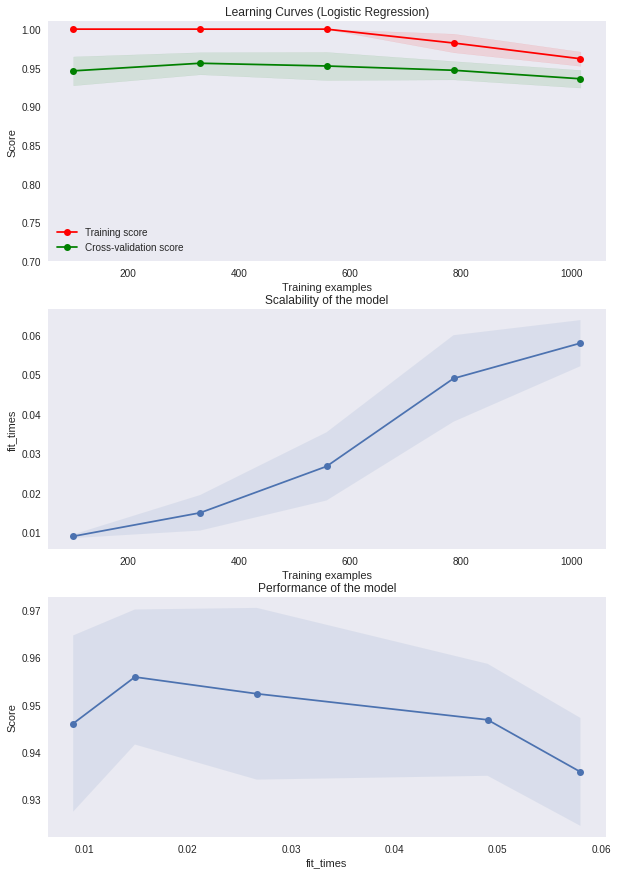

In [54]:
#Model Estimator
estimator = LogisticRegression(class_weight='balanced',penalty='none')

#Plot of Learning Curve (over original X and then cross val)
plt.style.use("seaborn")
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
title = "Learning Curves (Logistic Regression)"
plot_learning_curve(estimator, title, X, y, axes=axes, ylim=(0.7, 1.01), cv=cv, n_jobs=2)


**Decision Tree**

In [55]:
#Cross Validation splitting for evaluation of Decision Tree

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

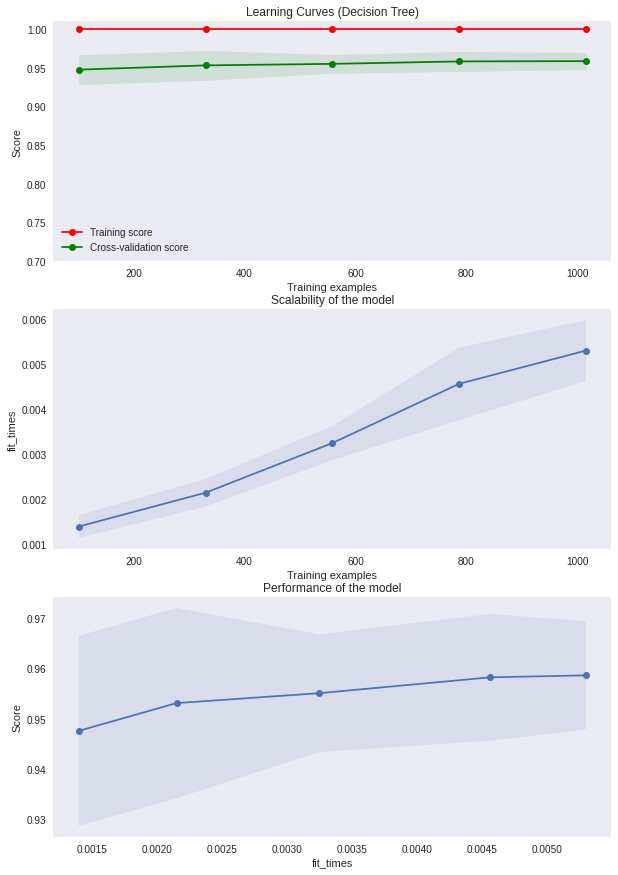

In [56]:
#Model Estimator

estimator = DecisionTreeClassifier()

#Plot of Learning Curve (over original X and then cross val)

title = r"Learning Curves (Decision Tree)"
plt.style.use("seaborn")
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
plot_learning_curve(estimator, title, X, y, axes=axes, ylim=(0.7, 1.01), cv=cv, n_jobs=2)

**Underfitting**

Let's take a look at the accuracies we get when the models underfit (LR and DT)

In [57]:
#Define the models

lr=LogisticRegression(fit_intercept=False,class_weight='balanced',C=0.001)
dt=DecisionTreeClassifier(max_leaf_nodes=2,max_features='log2',class_weight='balanced')

In [58]:
#Fit the models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [59]:
#Print the accuracies of the training and test splits for both models

lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)

dt_pred_train = dt.predict(X_train)
dt_pred_test = dt.predict(X_test)

In [61]:
print("----------LOGISTIC REGRESSION----------")
print("Accuracy of Training Split :",accuracy_score(y_train, lr_pred_train))
print("Accuracy of Test Split :",accuracy_score(y_test, lr_pred_test))
print()
print("----------DECISION TREE----------")
print("Accuracy of Training Split :",accuracy_score(y_train, dt_pred_train))
print("Accuracy of Test Split :",accuracy_score(y_test, dt_pred_test))

----------LOGISTIC REGRESSION----------
Accuracy of Training Split : 0.7650918635170604
Accuracy of Test Split : 0.797244094488189

----------DECISION TREE----------
Accuracy of Training Split : 0.8293963254593176
Accuracy of Test Split : 0.84251968503937


As we could see above, both models perform poorly as far as training is concerned. As a result, we also perform poorly on the testing set. This happened because of the hyperparameters set in a specific way. Now, let's visualize this.

**Cross-Validation**

In [62]:
#Cross Validation splitting for evaluation of Logistic Regression
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

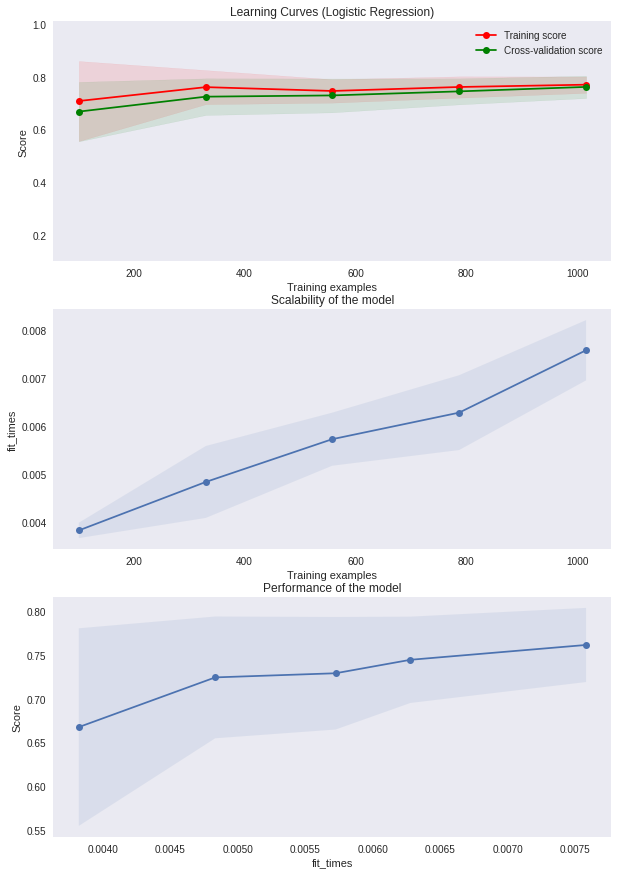

In [63]:
#Model Estimator
estimator = LogisticRegression(fit_intercept=False,class_weight='balanced',C=0.001)

#Plot of Learning Curve (over original X and then cross val)
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
title = "Learning Curves (Logistic Regression)"
plot_learning_curve(estimator, title, X, y, axes=axes, ylim=(0.1, 1.01), cv=cv, n_jobs=2)

**Decision Tree**

In [64]:
#Cross Validation splitting for evaluation of Decision Tree
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

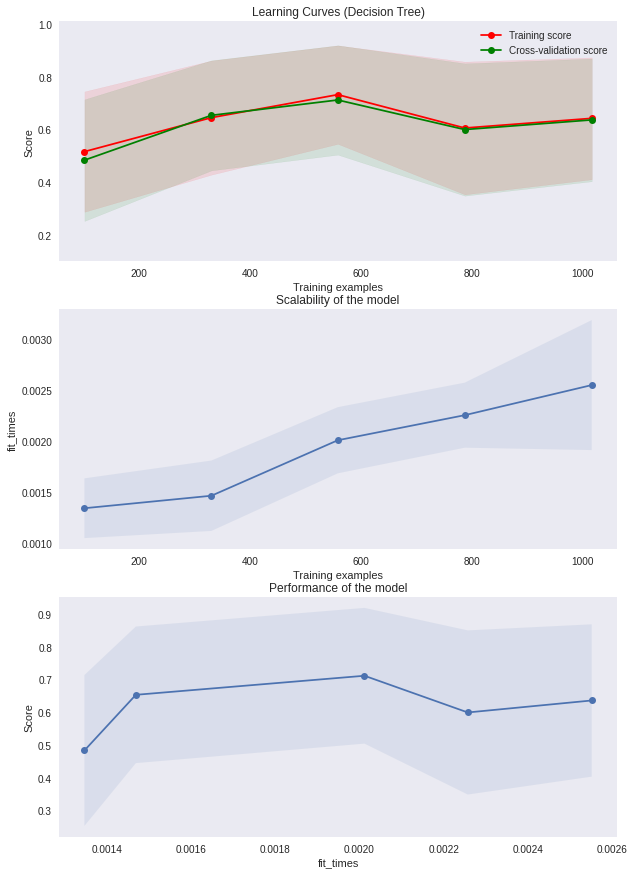

In [65]:
#Model Estimator
estimator = DecisionTreeClassifier(max_leaf_nodes=2,max_features='log2',class_weight='balanced')

#Plot of Learning Curve (over original X and then cross val)
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
title = "Learning Curves (Decision Tree)"
plot_learning_curve(estimator, title, X, y, axes=axes, ylim=(0.1, 1.01), cv=cv, n_jobs=2)

## Section 2

**L2 Regularization**

In [71]:
#alpha: Regularization Strength, Larger values specify stronger regularization
alphas = np.logspace(10, -3, 1000)

In [44]:
#Training Ridge CLassifier on different values of alpha
ridge_coefs = []
train_losses=[]
test_losses=[]
for a in alphas:
    ridge = RidgeClassifier(alpha = a, fit_intercept = True, normalize = True)
    ridge.fit(X_train, y_train)
    train_losses.append(log_loss(y_train, ridge._predict_proba_lr(X_train)))
    test_losses.append(log_loss(y_test, ridge._predict_proba_lr(X_test)))
    ridge_coefs.append(ridge.coef_)

In [67]:
# Make ridge_coefs numpy array of shape (no_of_alphas,no_of_features)
ridge_coefs = np.array(ridge_coefs).reshape((len(alphas),X.shape[1]))

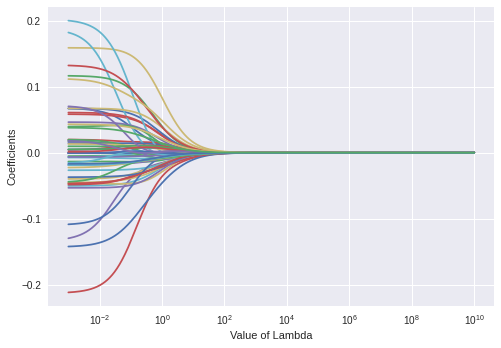

In [68]:
# Plot showing how coefficients vary with value of alpha
plt.style.use("seaborn")
ax = plt.gca()
ax.plot(alphas, ridge_coefs)
ax.set_xscale('log')
plt.xlabel('Value of Lambda')
plt.ylabel('Coefficients')
plt.axis('tight')
plt.show()

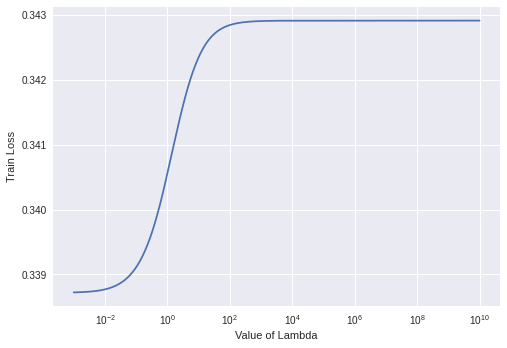

In [69]:
#Plot for Train Loss v/s Values of alpha
plt.style.use("seaborn")
ax = plt.gca()
plt.plot(alphas, train_losses)
ax.set_xscale('log')
plt.xlabel('Value of Lambda')
plt.ylabel('Train Loss')
plt.show()

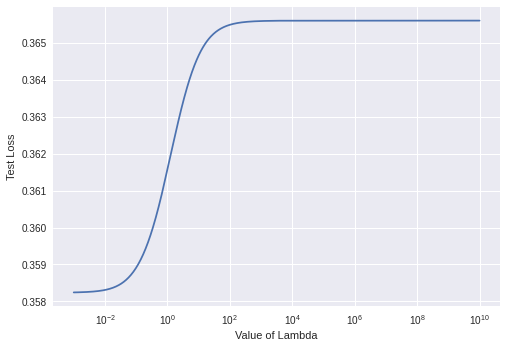

In [70]:
#Plot for Test Loss v/s Values of alpha
plt.style.use("seaborn")
ax = plt.gca()
plt.plot(alphas, test_losses)
ax.set_xscale('log')
plt.xlabel('Value of Lambda')
plt.ylabel('Test Loss')
plt.show()

**L1 Regularization**

In [72]:
#c : Inverse of regularization strength; smaller values specify stronger regularization.
C = np.logspace(-10,3,1000)

In [73]:
# Training logisitic Regression with l1 penalty for different values of C
lasso_coefs = []
train_losses=[]
test_losses=[]
for c in C:
    lr = LogisticRegression(penalty='l1', C=c, fit_intercept=True, solver='liblinear')
    lr.fit(X_train, y_train)
    train_losses.append(log_loss(y_train, lr.predict_proba(X_train)))
    test_losses.append(log_loss(y_test, lr.predict_proba(X_test)))
    lasso_coefs.append(lr.coef_)

In [75]:
#Make lasso_coefs numpy array of shape (no_of_C,no_of_features)
lasso_coefs = np.array(lasso_coefs).reshape((len(C), X.shape[1]))

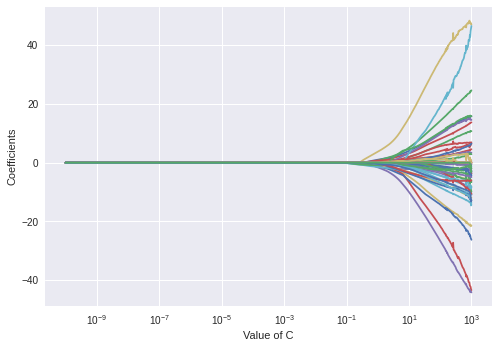

In [76]:
#Plot showing how coefficients vary with value of c
plt.style.use("seaborn")
ax = plt.gca()
ax.plot(C, lasso_coefs)
ax.set_xscale('log')
plt.xlabel('Value of C')
plt.ylabel('Coefficients')
plt.axis('tight')
plt.show()

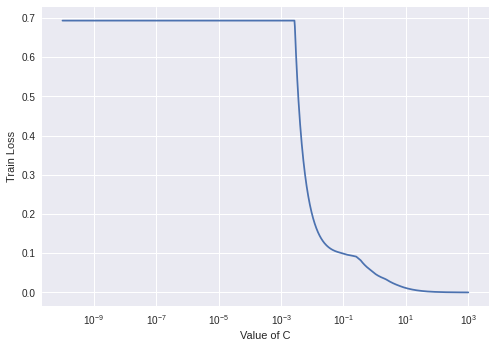

In [77]:
#Plot for Train Loss v/s Values of C
plt.style.use("seaborn")
ax = plt.gca()
plt.plot(C, train_losses)
ax.set_xscale('log')
plt.xlabel('Value of C')
plt.ylabel('Train Loss')
plt.show()

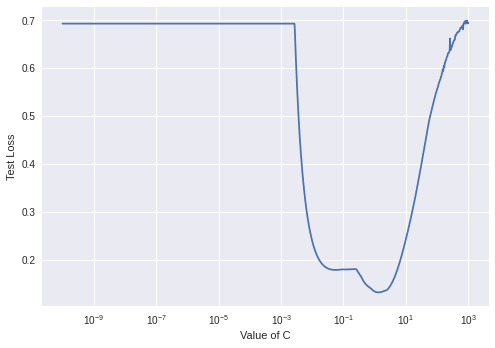

In [78]:
#Plot for Train Loss v/s Values of C
plt.style.use("seaborn")
ax = plt.gca()
plt.plot(C, test_losses)
ax.set_xscale('log')
plt.xlabel('Value of C')
plt.ylabel('Test Loss')
plt.show()